# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 48.4MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
import pandas as pd

df = pd.read_csv("Traffic Data.csv", parse_dates=['date_time'], index_col='date_time')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [3]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
!pip install skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [5]:
import skimpy as skim
skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 20000  │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ traffic_volume    │  20 │   0.1 │     3278 │   1977 │    113 │   1229 │   3430 │   4928 │  16780 │   ▇▇▂   │  │
│ │ temp              │   0 │     0 │    281.2 │  12.66 │  243.4 │  271.9 │  281.8 │  291.8 │  310.1 │ ▁▂▇▅▇▁  │  │
│ │ rain_1h           │   0 │     0 │   0.0484 │  0.398 │      0 │      0 │      0 │      0 │   10.6 │    ▇    │  │
│ │ snow_1h           │   0 │     0 │        0 │      0 │      0 │      0 │      0 │      0 │      0 │     ▇   │  │
│ │ clouds_all        │   0 │     0 │    49.38 │  39.65 │      0 │      1 │     75 │     90 │     92 │ ▇▁▂ ▃▇  │  │
│ └───────────────────┴─────┴───────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ weather_main                         │     0 │         0 │                        1 │                20000 │  │
│ │ weather_description                  │     0 │         0 │                      2.1 │                42286 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

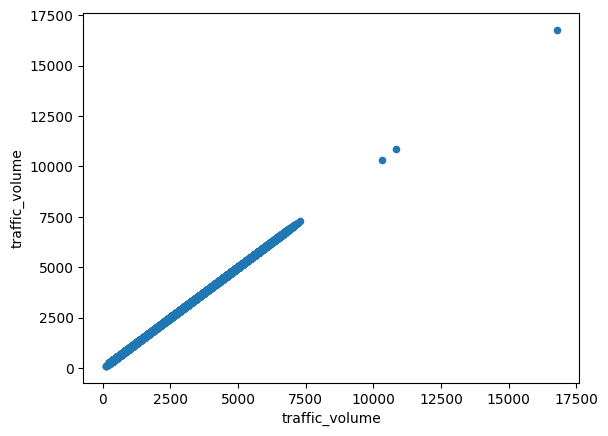

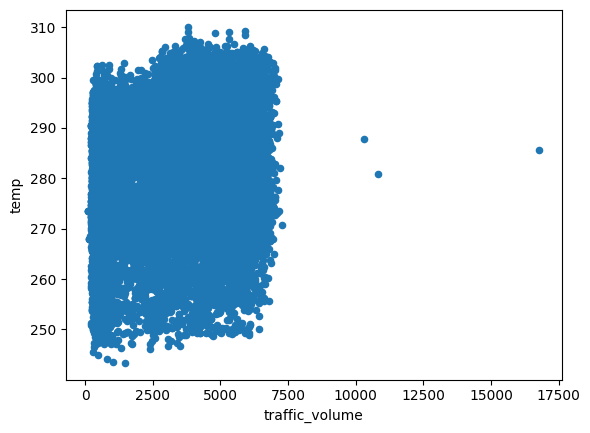

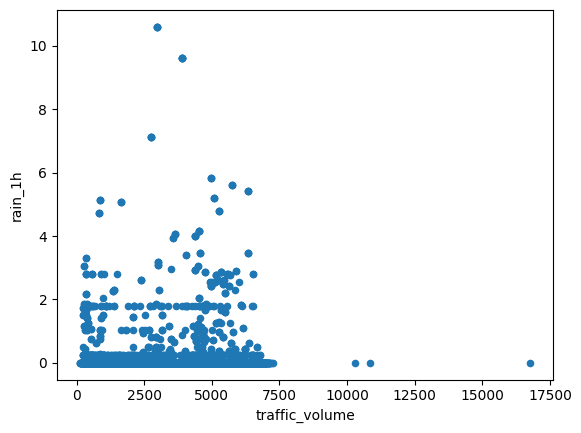

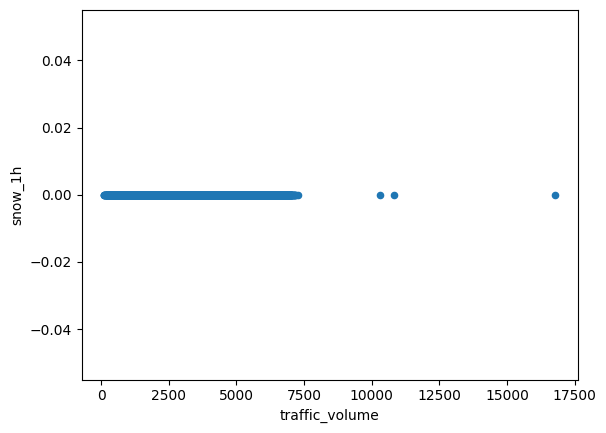

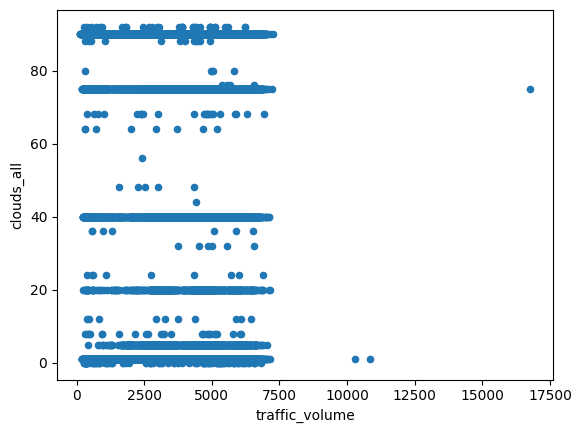

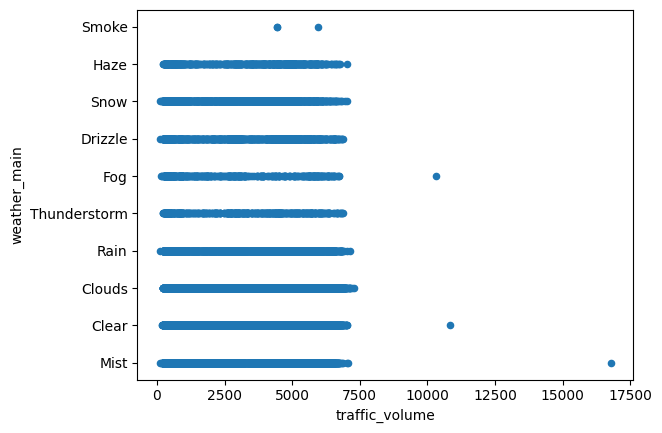

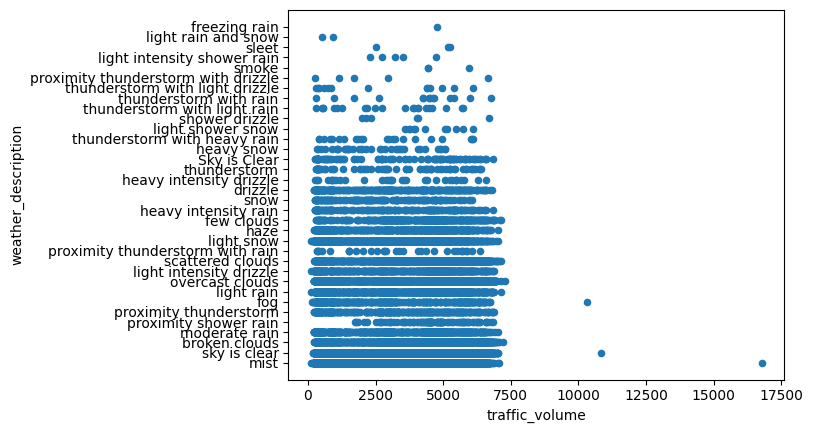

In [6]:
for col in df.columns:
  df.plot.scatter(x='traffic_volume',y=col)

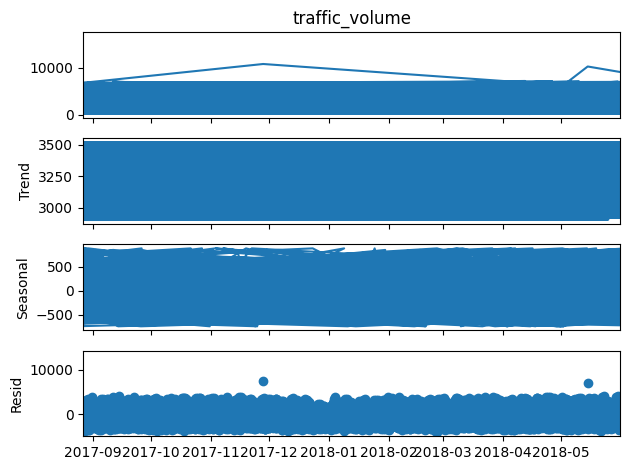

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
visual_test = df.copy()
visual_test.dropna(inplace=True)
result = seasonal_decompose(visual_test['traffic_volume'], model='additive', period=365).plot()

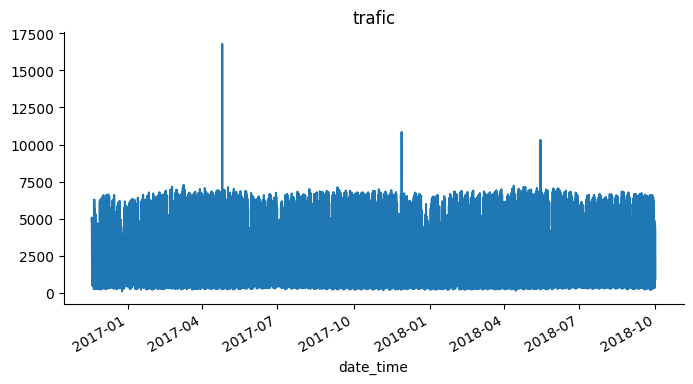

In [8]:
from matplotlib import pyplot as plt
df['traffic_volume'].plot(kind='line', figsize=(8, 4), title='trafic')
plt.gca().spines[['top', 'right']].set_visible(False)

# thire is outlaier in the target

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [9]:
# i sort the data by date
df.sort_values(by='date_time', inplace=True)

In [10]:
print(df['rain_1h'].value_counts())# rain is complax categury so i will drop it
print(df['snow_1h'].value_counts())# snow have 0 value for all

rain_1h
0.00    19287
0.25      269
1.78       68
1.02       29
2.79       17
        ...  
2.88        2
1.30        2
1.66        2
2.96        1
0.66        1
Name: count, Length: 87, dtype: int64
snow_1h
0.0    20000
Name: count, dtype: int64


In [11]:
df=df.drop(['weather_main'],axis=1)
df=df.drop(['weather_description'],axis=1)
df=df.drop(['snow_1h'],axis=1)

In [12]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
clouds_all,0


In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative = IterativeImputer(random_state=42)
imputed= iterative.fit_transform(df)
imputed= pd.DataFrame(imputed, columns=df.columns, index= df.index)

In [14]:
df['traffic_volume'].fillna(value=df['traffic_volume'].mean(), inplace=True)

In [15]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
clouds_all,0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [16]:


imputed['prev_traffic_volume'] = imputed['traffic_volume'].shift(1)

imputed['prev_traffic_volume'].fillna(0, inplace=True)

imputed['diff_traffic_volume'] = imputed['traffic_volume'].diff()

imputed['diff_traffic_volume'].fillna(0, inplace=True)

imputed['day_of_the_week'] = imputed.index.dayofweek

imputed['month'] = imputed.index.month

imputed['day_of_the_year'] = imputed.index.dayofyear


In [17]:
imputed

,traffic_volume,temp,rain_1h,clouds_all,prev_traffic_volume,diff_traffic_volume,day_of_the_week,month,day_of_the_year
date_time,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,90.0,0.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,90.0,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,90.0,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,90.0,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,90.0,5074.0,0.0,4,11,323
...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,75.0,3947.0,-404.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,90.0,3543.0,-762.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,90.0,2781.0,-622.0,6,9,273


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [18]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(imputed, test_size=0.3, shuffle=False)
train, val = train_test_split(train_val, test_size=0.3, shuffle=False) # im sure that the order is fine becouse i recntly oreder index by date

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)

In [20]:
train_scaled_df = pd.DataFrame(train_scaled, columns= train.columns)
val_scaled_df = pd.DataFrame(val_scaled, columns= val.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns= test.columns)


In [21]:
train_scaled_df

,traffic_volume,temp,rain_1h,clouds_all,prev_traffic_volume,diff_traffic_volume,day_of_the_week,month,day_of_the_year
0,0.285517,0.482320,0.0,0.978261,0.000000,0.472500,0.666667,0.909091,0.882192
1,0.285517,0.482320,0.0,0.978261,0.290328,0.472500,0.666667,0.909091,0.882192
2,0.285517,0.482320,0.0,0.978261,0.290328,0.472500,0.666667,0.909091,0.882192
3,0.297636,0.478548,0.0,0.978261,0.290328,0.482045,0.666667,0.909091,0.882192
4,0.297636,0.478548,0.0,0.978261,0.302366,0.472500,0.666667,0.909091,0.882192
...,...,...,...,...,...,...,...,...,...
9795,0.293317,0.692912,0.0,0.434783,0.368452,0.416698,0.666667,0.818182,0.780822
9796,0.245200,0.689140,0.0,0.434783,0.298075,0.434606,0.666667,0.818182,0.780822
9797,0.208843,0.615464,0.0,0.000000,0.250283,0.443867,0.666667,0.818182,0.780822
9798,0.215743,0.579915,0.0,0.217391,0.214171,0.477934,0.666667,0.818182,0.780822


In [22]:
train_scaled_df.iloc[:,0]

,traffic_volume
0,0.285517
1,0.285517
2,0.285517
3,0.297636
4,0.297636
...,...
9795,0.293317
9796,0.245200
9797,0.208843
9798,0.215743


In [25]:
import tensorflow as tf
from tensorflow.keras.utils import timeseries_dataset_from_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
window = 24

train_X_y = timeseries_dataset_from_array(train_scaled_df, targets=train_scaled_df.iloc[window:,0], sequence_length= window, batch_size= 2048)
val_X_y = timeseries_dataset_from_array(val_scaled_df, targets=val_scaled_df.iloc[window:,0], sequence_length= window, batch_size= 2048)
test_X_y = timeseries_dataset_from_array(test_scaled_df, targets=test_scaled_df.iloc[window:,0], sequence_length= window, batch_size= 2048)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
model = Sequential()
model.add(GRU(10, activation='tanh', return_sequences=True))
model.add(GRU(20, activation='tanh', return_sequences=True))
model.add(GRU(10, activation='tanh', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


filepath = "GRU.keras"

#checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_mse', save_best_only=True, mode='auto', verbose=1)

# earlyStopping callback
early_stopping = EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True, verbose=1)

# combine callbacks
callbacks_list = [checkpoint, early_stopping]
history1 = model.fit(train_X_y, epochs=100, validation_data=(val_X_y),callbacks=callbacks_list)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.1126 - mse: 0.1126
Epoch 1: val_mse improved from inf to 0.09393, saving model to GRU.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 0.0939 - val_mse: 0.0939
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0922 - mse: 0.0922
Epoch 2: val_mse improved from 0.09393 to 0.07486, saving model to GRU.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0749 - val_mse: 0.0749
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0727 - mse: 0.0727
Epoch 3: val_mse improved from 0.07486 to 0.05634, saving model to GRU.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 0.0539 - mse: 0.0539
Epoch 4: val_mse improved from 0.05634 to 0.03963, saving model to GRU.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - loss: 0.0529 - mse: 

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [28]:
import keras as ks
GRU=ks.saving.load_model('/content/GRU.keras')

In [29]:
GRU.predict(test_X_y) # prediction of traffic volum

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step


array([[0.2595929 ],
       [0.23097059],
       [0.20475788],
       ...,
       [0.18040463],
       [0.13321471],
       [0.08223841]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [30]:
X_test, y_test = next(iter(test_X_y))
y_test


<tf.Tensor: shape=(2048,), dtype=float64, numpy=
array([0.18658507, 0.20932325, 0.23560115, ..., 0.26835853, 0.18814495,
       0.15514759])>

In [31]:
GRU_pre = GRU.predict(X_test)
GRU_pre

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.2595929 ],
       [0.23097059],
       [0.20475791],
       ...,
       [0.30771807],
       [0.29104233],
       [0.2537726 ]], dtype=float32)

Mean Squared Error (MSE): 0.002772632631726892
Mean Absolute Error (MAE): 0.04054357973713249


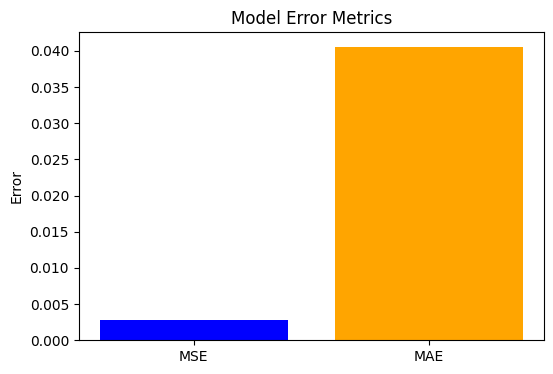

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



mse = mean_squared_error(y_test, GRU_pre)
mae = mean_absolute_error(y_test, GRU_pre)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


metrics = ['MSE', 'MAE']
values = [mse, mae]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.ylabel('Error')
plt.title('Model Error Metrics')
plt.show()

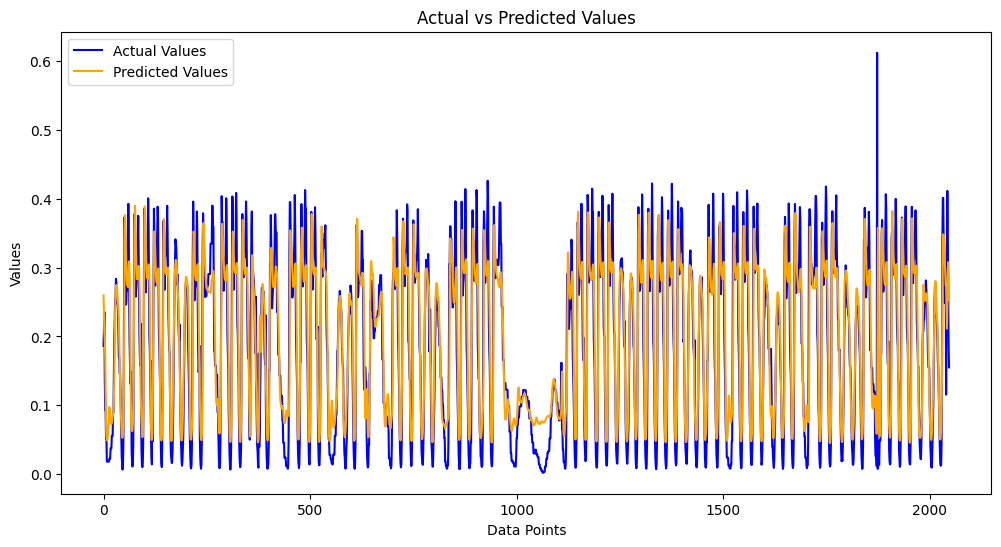

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(GRU_pre, label='Predicted Values', color='orange')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# the model egnor the outlayer

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', return_sequences=True, ))
model.add(SimpleRNN(20, activation='tanh', return_sequences=True))
model.add(SimpleRNN(10, activation='tanh', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


filepath = "SRNN.keras"

#checkpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_mse', save_best_only=True, mode='auto', verbose=1)

# earlyStopping callback
early_stopping = EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True, verbose=1)

# combine callbacks
callbacks_list = [checkpoint, early_stopping]
history2 = model.fit(train_X_y, epochs=100, validation_data=(val_X_y),callbacks=callbacks_list)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - loss: 0.0562 - mse: 0.0562
Epoch 1: val_mse improved from inf to 0.04152, saving model to SRNN.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 947ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0322 - mse: 0.0322
Epoch 2: val_mse improved from 0.04152 to 0.02654, saving model to SRNN.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.0216 - mse: 0.0216
Epoch 3: val_mse improved from 0.02654 to 0.01924, saving model to SRNN.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0167 - mse: 0.0167
Epoch 4: val_mse improved from 0.01924 to 0.01604, saving model to SRNN.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - loss: 0.0164 - m

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [36]:
import keras as ks
RNN=ks.saving.load_model('/content/SRNN.keras')

In [37]:
RNN.predict(test_X_y) # prediction of traffic volum

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step


array([[0.20779836],
       [0.16702609],
       [0.1498031 ],
       ...,
       [0.12593487],
       [0.11317885],
       [0.09094311]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [38]:
X_test, y_test = next(iter(test_X_y))
y_test


<tf.Tensor: shape=(2048,), dtype=float64, numpy=
array([0.18658507, 0.20932325, 0.23560115, ..., 0.26835853, 0.18814495,
       0.15514759])>

In [40]:
RNN_pre = RNN.predict(X_test)
RNN_pre

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[0.20779836],
       [0.16702612],
       [0.1498031 ],
       ...,
       [0.33032864],
       [0.28759107],
       [0.20402972]], dtype=float32)

Mean Squared Error (MSE): 0.002297451633908976
Mean Absolute Error (MAE): 0.0348710355989484


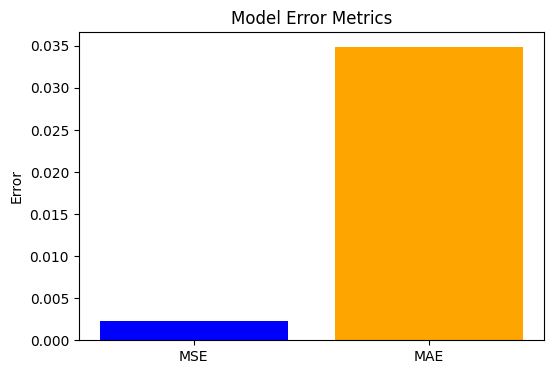

In [41]:
mse = mean_squared_error(y_test, RNN_pre)
mae = mean_absolute_error(y_test, RNN_pre)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


metrics = ['MSE', 'MAE']
values = [mse, mae]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.ylabel('Error')
plt.title('Model Error Metrics')
plt.show()

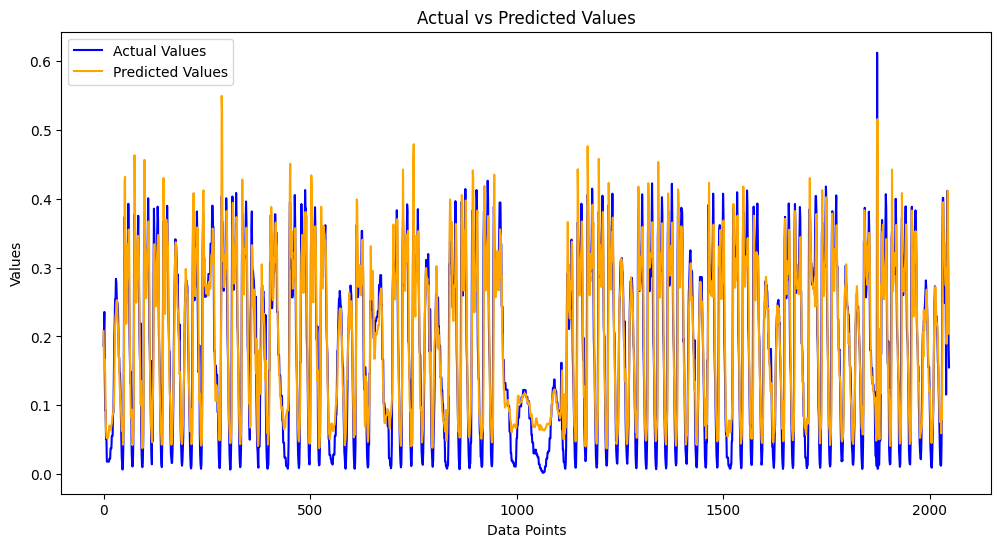

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(RNN_pre, label='Predicted Values', color='orange')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# the model egnor the outlayer

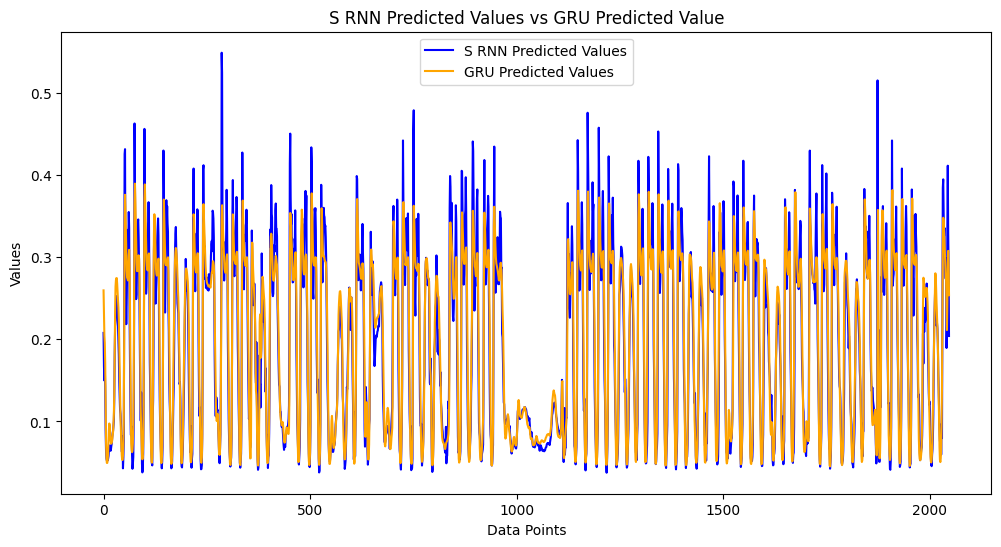

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(RNN_pre, label='S RNN Predicted Values', color='blue')
plt.plot(GRU_pre, label='GRU Predicted Values', color='orange')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('S RNN Predicted Values vs GRU Predicted Value')
plt.legend()
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
>>> first explor the data and see if the target is a numerical.
>>> weather_main weather_description is a category and the columns category depends on the combining between the all wither conditions[temp,rain_1h,snow_1h,clouds_all,weather_main] and this means there is a correlation between them, and that well led to overfitting.
>>> from the EDA, I see a 20 nall value in the target, and  i have to del with it with the mean.
>>> i dropped snow_1h has the value of 0 in all rows and i guess the data from city smaller to Riyad :) .
>>> there an outliers in the target variable and to be honest I forget about them until i test the model in testing the model i see the GRU model ignores the outliers and make a prediction smaller to the other prediction otherwise the Sample RNN is go and predicate something like outliers.
  
Feature Engineering: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.


>>> use shift methode after impute all the feature

>> Add day of the week, month, and Day of the year to Calculate the difference between the values in `traffic_volume`.



Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?

>>> select GRU And Simple RNN for time series forecasting.
>>>i don't determine the input in the Bothe model because the RNNS can
start with that 'tanh' to the hidden layer with returning sequence in the inner layer and the outer layer most return sequence, also the output layer is sigmoid becase we need to predict a number>

>> i use [checkpoint, early_stopping] checkpoint will save in the directory the best model according to val_mse and early stopping will shutdown the model if it not changed in specific patience and i specified it to 5.
    
Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

>>>batch size because I dont want the model to calculate the loss and fix  the model many time i chose 2048.


Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?

>>> MAE and mse is to calculate the percentage error in numerical target

Model Tuning (If Done): Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
Overfitting and Underfitting: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
>>i use early stopping to not full in overfitting also by the visualization we see the model mse in training is low in training and validation.


>>> i visualize all the model predaction and the GRU is more accurate according to MSE and MAE
>>>in the final visualization i compare between Sample RNNs model and GRU prediction model and i observe that the GUR Sample RNN have a lot of value we can consider it as outlier.